In [52]:
import pandas as pd
import numpy as np
import numpy.random as rnd
from MCForecastTools import MCSimulation
import pathlib as Path

In [242]:
ng_df = pd.read_csv('../Marc/Resources/NG_Nymex_Max-2023-2013.csv')
wti_df = pd.read_csv('../Marc/Resources/WTI_Nymex_Max-2023-2013.csv')

In [243]:
ng_df=ng_df.drop(columns=['Volume','Open', 'High', 'Low'])
ng_df.columns=('date','close')
ng_df.head()


,date,close
0,01/18/2023,3.311
1,01/17/2023,3.586
2,01/13/2023,3.419
3,01/12/2023,3.695
4,01/11/2023,3.671


In [244]:
wti_df=wti_df.drop(columns=['Volume','Open', 'High', 'Low'])
wti_df.columns=('date','close')
wti_df.head()

,date,close
0,01/18/2023,79.48
1,01/17/2023,80.18
2,01/13/2023,79.86
3,01/12/2023,78.39
4,01/11/2023,77.41


In [247]:
to_merge_dict = {'NG': ng_df , 'WTI': wti_df}
#display(to_merge_dict)

{'NG':             date  close
 0     01/18/2023  3.311
 1     01/17/2023  3.586
 2     01/13/2023  3.419
 3     01/12/2023  3.695
 4     01/11/2023  3.671
 ...          ...    ...
 2538  01/25/2013  3.444
 2539  01/24/2013  3.446
 2540  01/23/2013  3.554
 2541  01/22/2013  3.558
 2542  01/21/2013  3.566
 
 [2543 rows x 2 columns],
 'WTI':             date  close
 0     01/18/2023  79.48
 1     01/17/2023  80.18
 2     01/13/2023  79.86
 3     01/12/2023  78.39
 4     01/11/2023  77.41
 ...          ...    ...
 2538  01/25/2013  95.88
 2539  01/24/2013  95.95
 2540  01/23/2013  95.23
 2541  01/22/2013  96.24
 2542  01/21/2013  95.56
 
 [2543 rows x 2 columns]}

In [249]:
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())

In [250]:
### Create Season indicator

merged_df['season_date'] = merged_df['NG','date']
merged_df = merged_df.set_index('season_date')

merged_df['month_date'] = pd.DatetimeIndex(merged_df.index).strftime('%m%d')
merged_df['month_date'] = merged_df['month_date'].astype(float)

# create a column that displays the season (winter, spring, fall or summer)
merged_df['season'] = np.where((merged_df['month_date'] >= 1221),"winter",
                                np.where((merged_df['month_date'] >=101) & (merged_df['month_date'] <321), "winter",
                                         np.where((merged_df['month_date'] >=321) & (merged_df['month_date'] <621), "spring",
                                                  np.where((merged_df['month_date'] >=621) & (merged_df['month_date'] <921), "summer","fall"))))

merged_df.head()

NG                WTI        month_date  season
                   date  close        date  close                   
season_date                                                         
01/18/2023   01/18/2023  3.311  01/18/2023  79.48      118.0  winter
01/17/2023   01/17/2023  3.586  01/17/2023  80.18      117.0  winter
01/13/2023   01/13/2023  3.419  01/13/2023  79.86      113.0  winter
01/12/2023   01/12/2023  3.695  01/12/2023  78.39      112.0  winter
01/11/2023   01/11/2023  3.671  01/11/2023  77.41      111.0  winter

In [251]:
def select_month(season):
    portfolio_data_sliced = merged_df.loc[merged_df['season'] == season]
    portfolio_data_sliced.reindex
    del portfolio_data_sliced['month_date']
    del portfolio_data_sliced['season']
    
    return(portfolio_data_sliced)

In [252]:
def monte_carlo_sim(season,input_season_days):
    
    
    MC_simulation = MCSimulation(
        portfolio_data= season,
        weights=[1, 0],
        num_simulation=1000,
        num_trading_days= input_season_days,
    )
    
    return(MC_simulation)

In [253]:
winter = select_month('winter')
winter =  monte_carlo_sim(winter,89)

spring = select_month('spring')
spring =  monte_carlo_sim(spring,93)

summer = select_month('summer')
summer =  monte_carlo_sim(summer,94)

fall = select_month('fall')
fall =  monte_carlo_sim(fall,89)


In [254]:
display(winter.portfolio_data.tail())
display(spring.portfolio_data.tail())
display(summer.portfolio_data.tail())
display(fall.portfolio_data.tail())

NG                             WTI                    
                   date  close daily_return        date  close daily_return
season_date                                                                
01/25/2013   01/25/2013  3.444     0.047127  01/25/2013  95.88    -0.005807
01/24/2013   01/24/2013  3.446     0.000581  01/24/2013  95.95     0.000730
01/23/2013   01/23/2013  3.554     0.031341  01/23/2013  95.23    -0.007504
01/22/2013   01/22/2013  3.558     0.001125  01/22/2013  96.24     0.010606
01/21/2013   01/21/2013  3.566     0.002248  01/21/2013  95.56    -0.007066

NG                             WTI                    
                   date  close daily_return        date  close daily_return
season_date                                                                
03/27/2013   03/27/2013  4.068     0.010934  03/27/2013  96.58    -0.006685
03/26/2013   03/26/2013  3.976    -0.022616  03/26/2013  96.34    -0.002485
03/25/2013   03/25/2013  3.865    -0.027918  03/25/2013  94.81    -0.015881
03/22/2013   03/22/2013  3.927     0.016041  03/22/2013  93.71    -0.011602
03/21/2013   03/21/2013  3.935     0.002037  03/21/2013  92.45    -0.013446

NG                             WTI                    
                   date  close daily_return        date  close daily_return
season_date                                                                
06/27/2013   06/27/2013  3.582     0.004769  06/27/2013  97.05     0.005075
06/26/2013   06/26/2013  3.707     0.034897  06/26/2013  95.50    -0.015971
06/25/2013   06/25/2013  3.647    -0.016186  06/25/2013  95.32    -0.001885
06/24/2013   06/24/2013  3.739     0.025226  06/24/2013  95.18    -0.001469
06/21/2013   06/21/2013  3.771     0.008558  06/21/2013  93.69    -0.015655

NG                             WTI                     
                   date  close daily_return        date   close daily_return
season_date                                                                 
09/27/2013   09/27/2013  3.589     0.008146  09/27/2013  102.87     0.005277
09/26/2013   09/26/2013  3.498    -0.025355  09/26/2013  103.03     0.001555
09/25/2013   09/25/2013  3.493    -0.001429  09/25/2013  102.66    -0.003591
09/24/2013   09/24/2013  3.492    -0.000286  09/24/2013  103.13     0.004578
09/23/2013   09/23/2013  3.602     0.031501  09/23/2013  103.59     0.004460

In [255]:
import warnings
warnings.filterwarnings("ignore")
winter.calc_cumulative_return()
spring.calc_cumulative_return()
summer.calc_cumulative_return()
fall.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002031,0.969158,1.052420,0.937610,0.954174,1.003281,1.053272,1.026549,1.019981,1.078301,...,1.003718,0.988751,0.931979,0.958826,1.024827,0.922815,1.027530,1.009671,0.981338,1.007877
2,1.048543,1.035498,1.096428,0.981351,0.948202,1.031443,1.021734,0.925367,0.951328,1.184945,...,1.015417,1.010439,1.024907,0.945666,1.051153,0.841582,1.022819,1.012092,0.996974,1.008915
3,1.071372,1.068362,1.112585,1.020090,0.837788,1.007024,1.018178,0.976975,1.017974,1.157550,...,1.004008,0.974742,0.971785,0.923447,1.202961,0.905780,0.993394,1.035490,1.017252,0.984602
4,1.028411,1.198063,1.138849,1.008180,0.812180,1.038591,1.032397,1.053170,1.018019,1.099646,...,0.998761,0.944215,0.962796,0.959290,1.159367,0.819095,0.992333,1.026604,1.023367,1.061205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.207017,4.392079,0.763780,0.864601,4.686118,1.013991,0.837242,0.972351,0.851944,0.878894,...,1.636557,1.575293,1.388342,0.872756,1.437822,0.636427,0.417043,1.081606,0.587515,1.329795
86,1.251633,4.556589,0.679853,0.806202,4.771082,1.048789,0.844937,1.082930,0.813066,0.956830,...,1.658000,1.752055,1.301420,0.905008,1.539220,0.595676,0.393662,1.081378,0.591459,1.306989
87,1.233813,4.795836,0.652279,0.805930,4.784295,1.090947,0.970075,1.059166,0.835696,0.970312,...,1.774770,1.699312,1.248827,0.943869,1.782103,0.587334,0.389184,1.090907,0.658400,1.330971
88,1.208033,4.930188,0.671928,0.742158,4.863787,1.038172,0.870050,1.022560,0.847522,0.943273,...,1.732739,1.794431,1.198850,1.000198,1.714326,0.615329,0.374246,1.094996,0.664676,1.343016


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 89 Trading Days.'}>

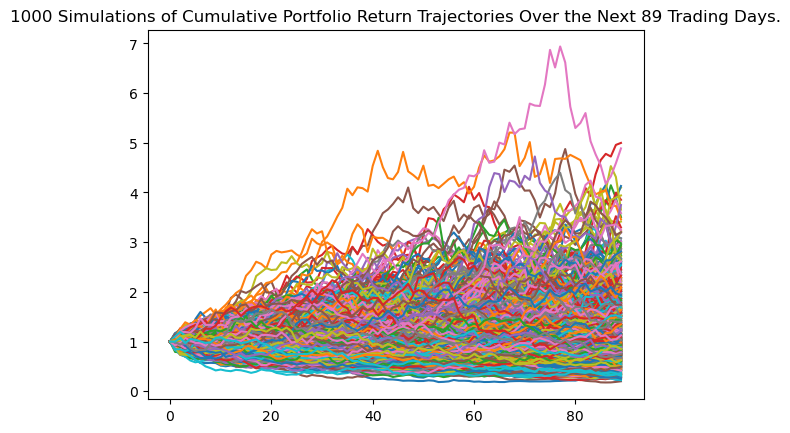

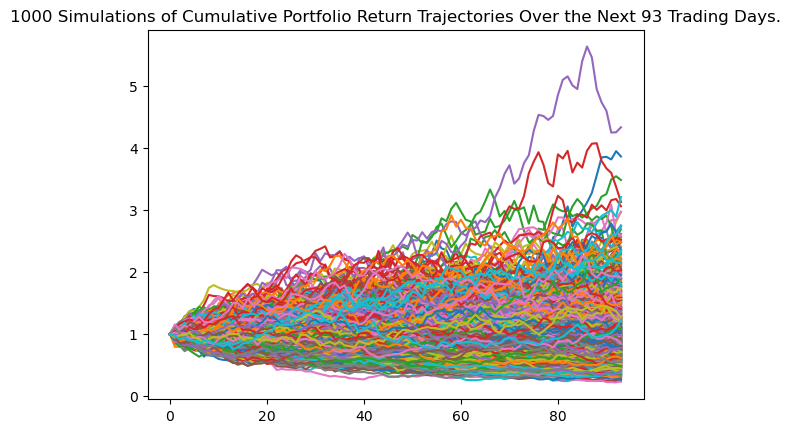

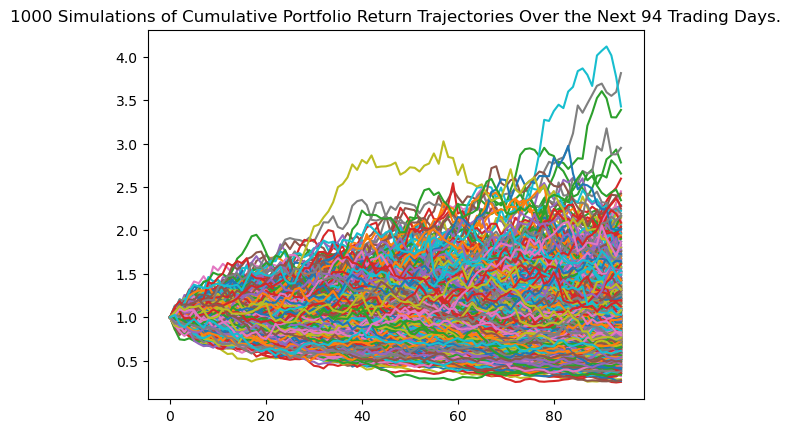

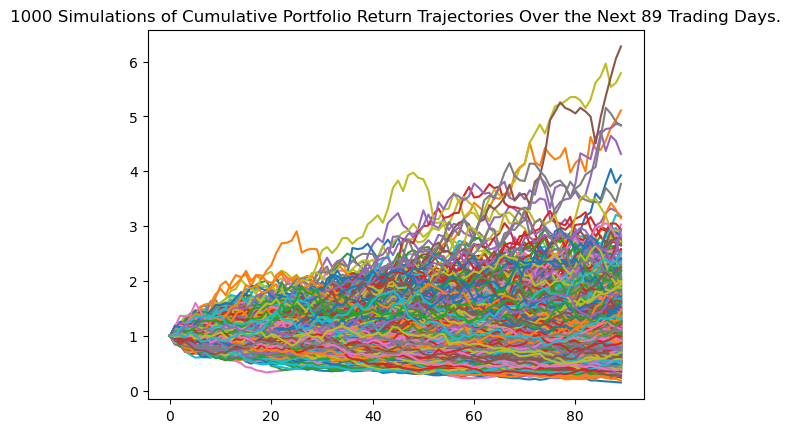

In [256]:
#one_year_simulation.plot_simulation()

winter.plot_simulation()
spring.plot_simulation()
summer.plot_simulation()
fall.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

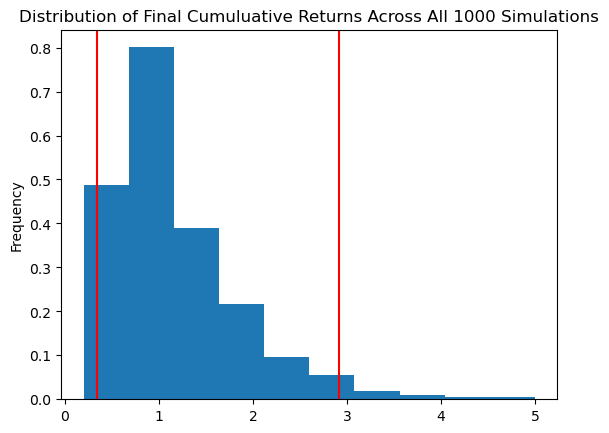

In [257]:
display(winter.plot_distribution())

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

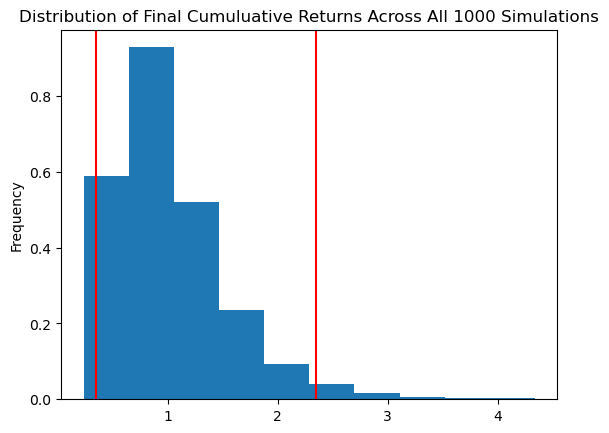

In [258]:
display(spring.plot_distribution())

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

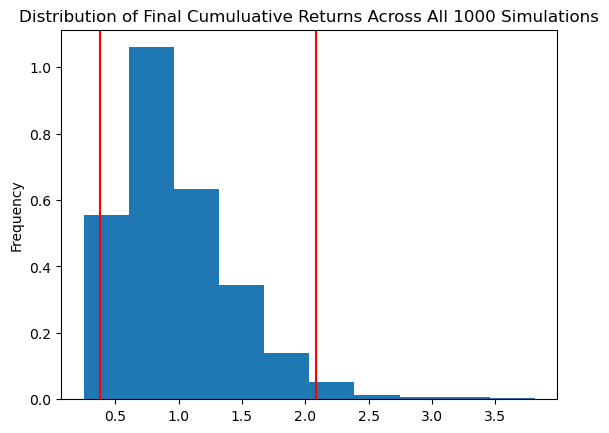

In [259]:
display(summer.plot_distribution())

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

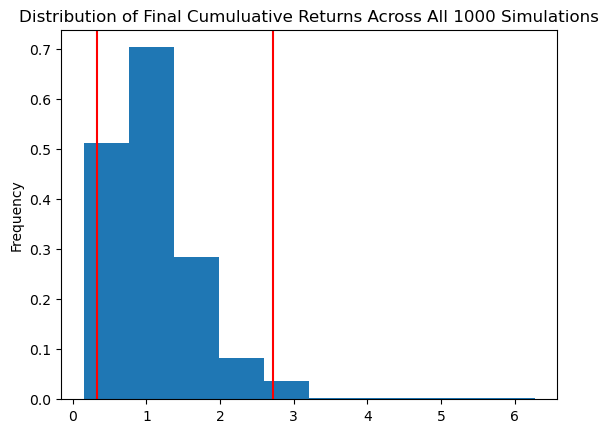

In [263]:
display(fall.plot_distribution())

In [264]:
#one_year_simulation.summarize_cumulative_return()

display(winter.summarize_cumulative_return())
display(spring.summarize_cumulative_return())
display(summer.summarize_cumulative_return())
display(fall.summarize_cumulative_return())

count           1000.000000
mean               1.165998
std                0.674077
min                0.201714
25%                0.704498
50%                0.983327
75%                1.497097
max                4.997289
95% CI Lower       0.336840
95% CI Upper       2.917395
Name: 89, dtype: float64

count           1000.000000
mean               1.014056
std                0.522330
min                0.237050
25%                0.654030
50%                0.901802
75%                1.247421
max                4.338283
95% CI Lower       0.346146
95% CI Upper       2.346155
Name: 93, dtype: float64

count           1000.000000
mean               0.984166
std                0.454576
min                0.254048
25%                0.663425
50%                0.896674
75%                1.218758
max                3.811103
95% CI Lower       0.377249
95% CI Upper       2.080871
Name: 94, dtype: float64

count           1000.000000
mean               1.119465
std                0.648491
min                0.151286
25%                0.693581
50%                0.984163
75%                1.392003
max                6.274030
95% CI Lower       0.327167
95% CI Upper       2.717067
Name: 89, dtype: float64